In [71]:
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize.toktok import ToktokTokenizer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/wolffgang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
driver = webdriver.Chrome(executable_path='chromedriver')

In [183]:
driver.get('https://www.letras.com/duki/discografia/')
content = driver.page_source
soup = BeautifulSoup(content)

In [184]:
tags = soup.find_all(attrs={"class" : "cnt-list-row -song is-visible"})

In [185]:
output = [x["data-shareurl"] for x in tags]

In [186]:
songs = output

In [187]:
lyrics = []
for song in songs:
    driver.get(song)
    content = driver.page_source
    soup = BeautifulSoup(content)
    tags = soup.find_all(attrs={"class" : 'cnt-letra'})
    for p in tags:
        lyrics.append(p.findAll('p'))

In [188]:
def remove_html_tags(texts):
    output = []
    for text in texts:
        remove_html = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
        text = re.sub(remove_html, ' ', str(text))
        output.append(re.sub('[\([{})\]]', '', text))
    return output

In [189]:
out = remove_html_tags(lyrics)

In [190]:
stopword_list = nltk.corpus.stopwords.words('spanish')
stopword_list.extend(nltk.corpus.stopwords.words('english'))
stopword_list.extend(['si', 'pa','ey', 'da', 'va', 'yeh', 'yeah'])
tokenizer = ToktokTokenizer()

def remove_stopwords(text, is_lower_case=True, stopwords=stopword_list):
    if is_lower_case:
        text = text.lower()
    tokens = tokenizer.tokenize(text)
    no_stop = [w for w in tokens if not w in stopword_list]
    text = " ".join(no_stop)
    return text

def remove_special_chars(text, remove_digits=False):
    chars= r"[^a-zA-Z0-9 ]+"
    text = re.sub(chars, '', text)
    if remove_digits:
        numbers = r"[\d]"
        text = re.sub(numbers, '', text)
    return text

def remove_extra_whitespace(text):
    text = re.sub(' +', ' ', text.strip())
    return text

In [191]:
cleaned = []
for lyric in out:
    lyric = remove_stopwords(lyric)
    lyric = remove_special_chars(lyric)
    lyric = remove_extra_whitespace(lyric)
    cleaned.append(lyric)

In [197]:
cleaned = remove_special_chars(str(cleaned))

In [199]:
wordcloud = WordCloud(background_color='black',
                        width=2500,
                        height=1500).generate(cleaned)

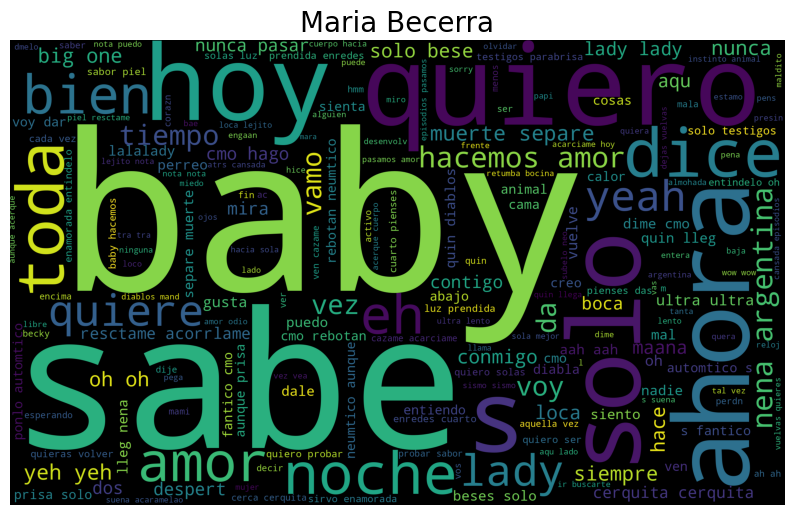

In [146]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Maria Becerra',fontsize=20)
plt.show()

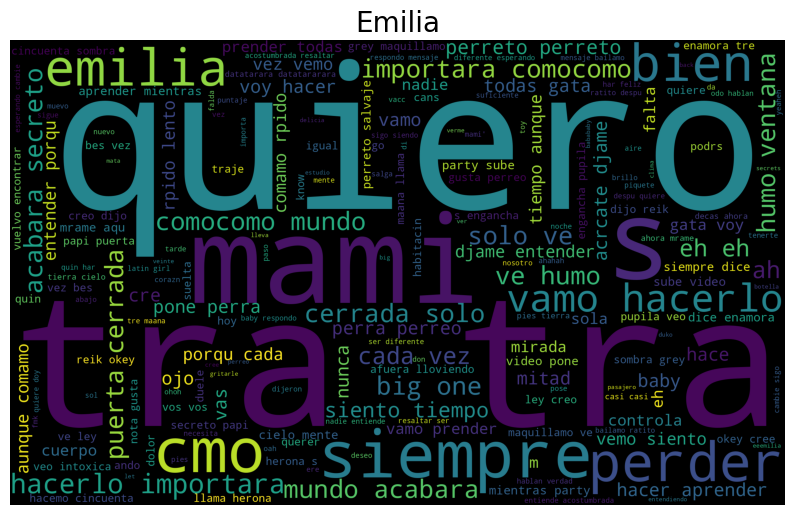

In [161]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Emilia',fontsize=20)
plt.show()

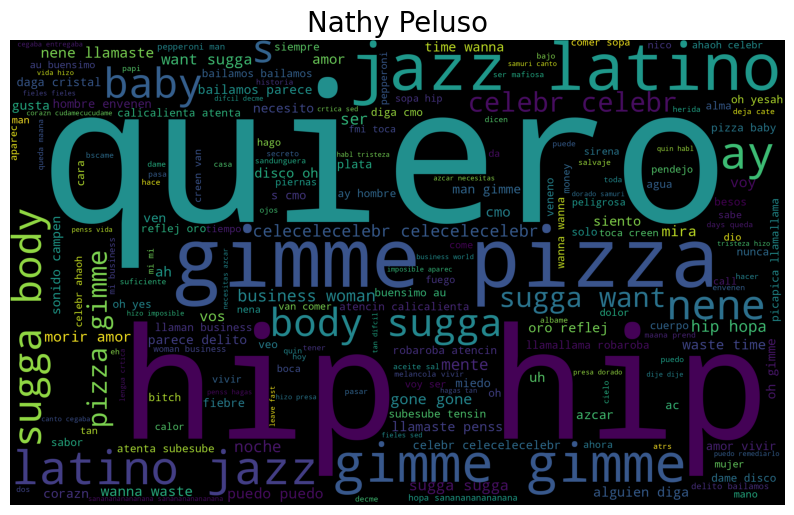

In [180]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Nathy Peluso',fontsize=20)
plt.show()

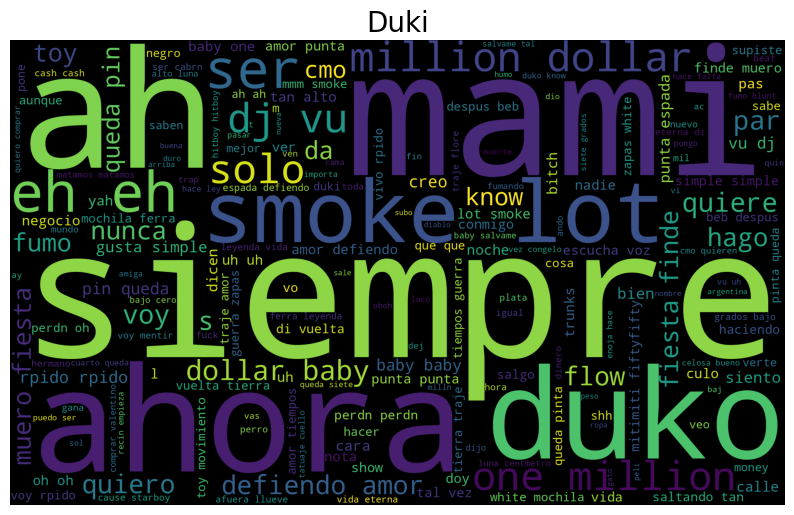

In [200]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Duki',fontsize=20)
plt.show()